In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv('Titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

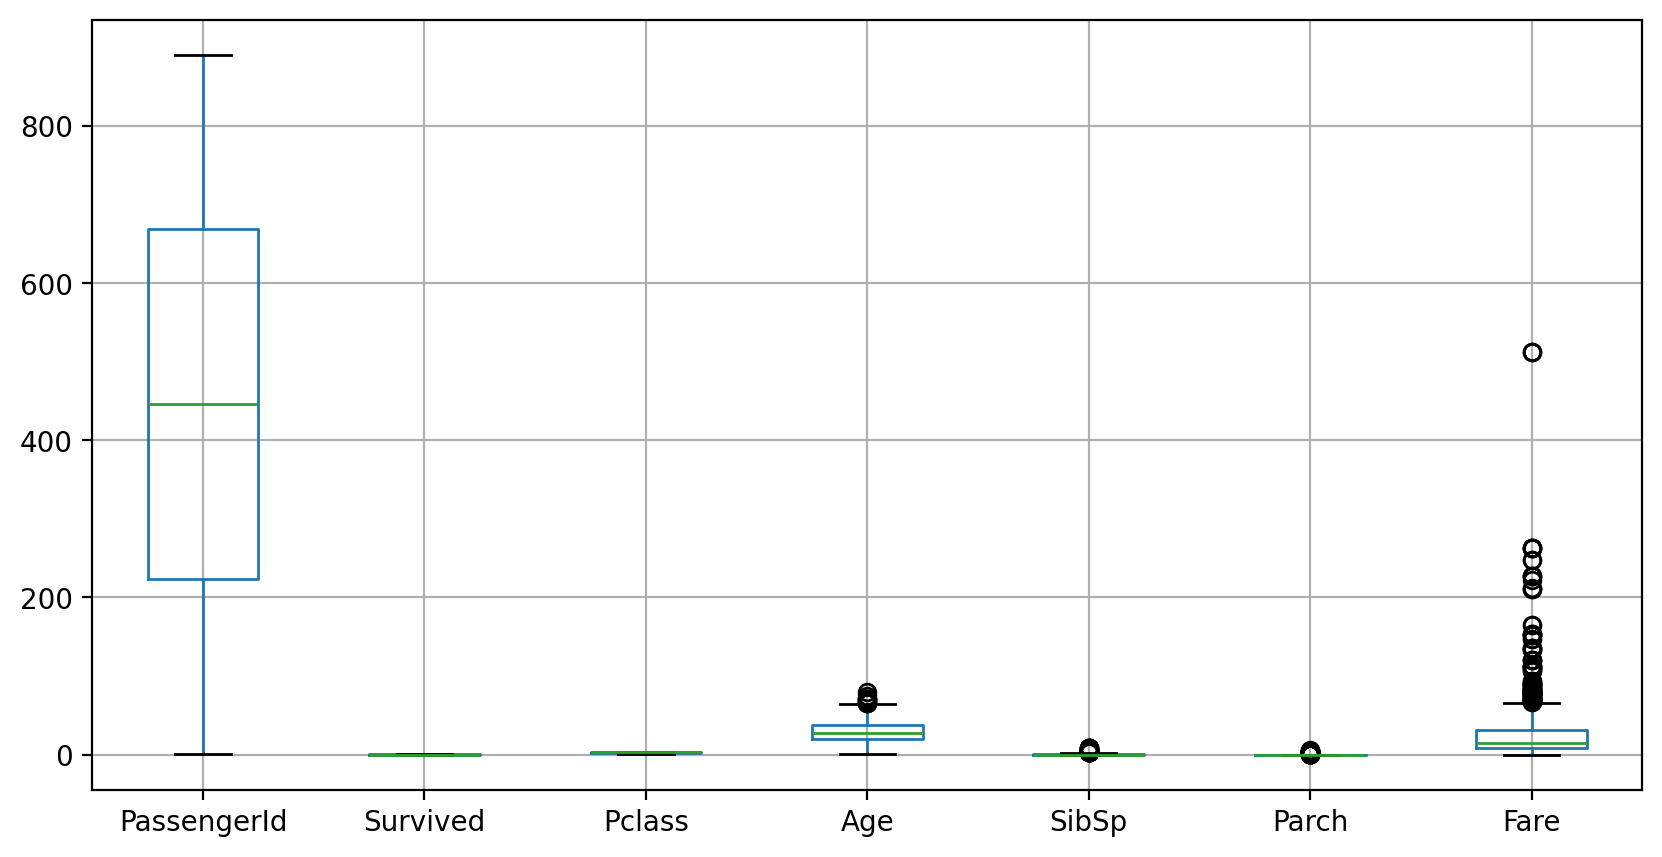

In [5]:
df.boxplot()

In [6]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing age with median value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing embarked with the mode value
df.drop(columns=['Cabin'], inplace=True)  # Drop the 'Cabin' column due to many missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Extract titles from the 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify the 'Title' column
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Lady', 'Countess'], 'Rare')

# Create a family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Drop unnecessary columns
df.drop(columns=['Ticket', 'Name', 'PassengerId'], inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' column
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# One-Hot Encode 'Embarked' and 'Title' columns
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)


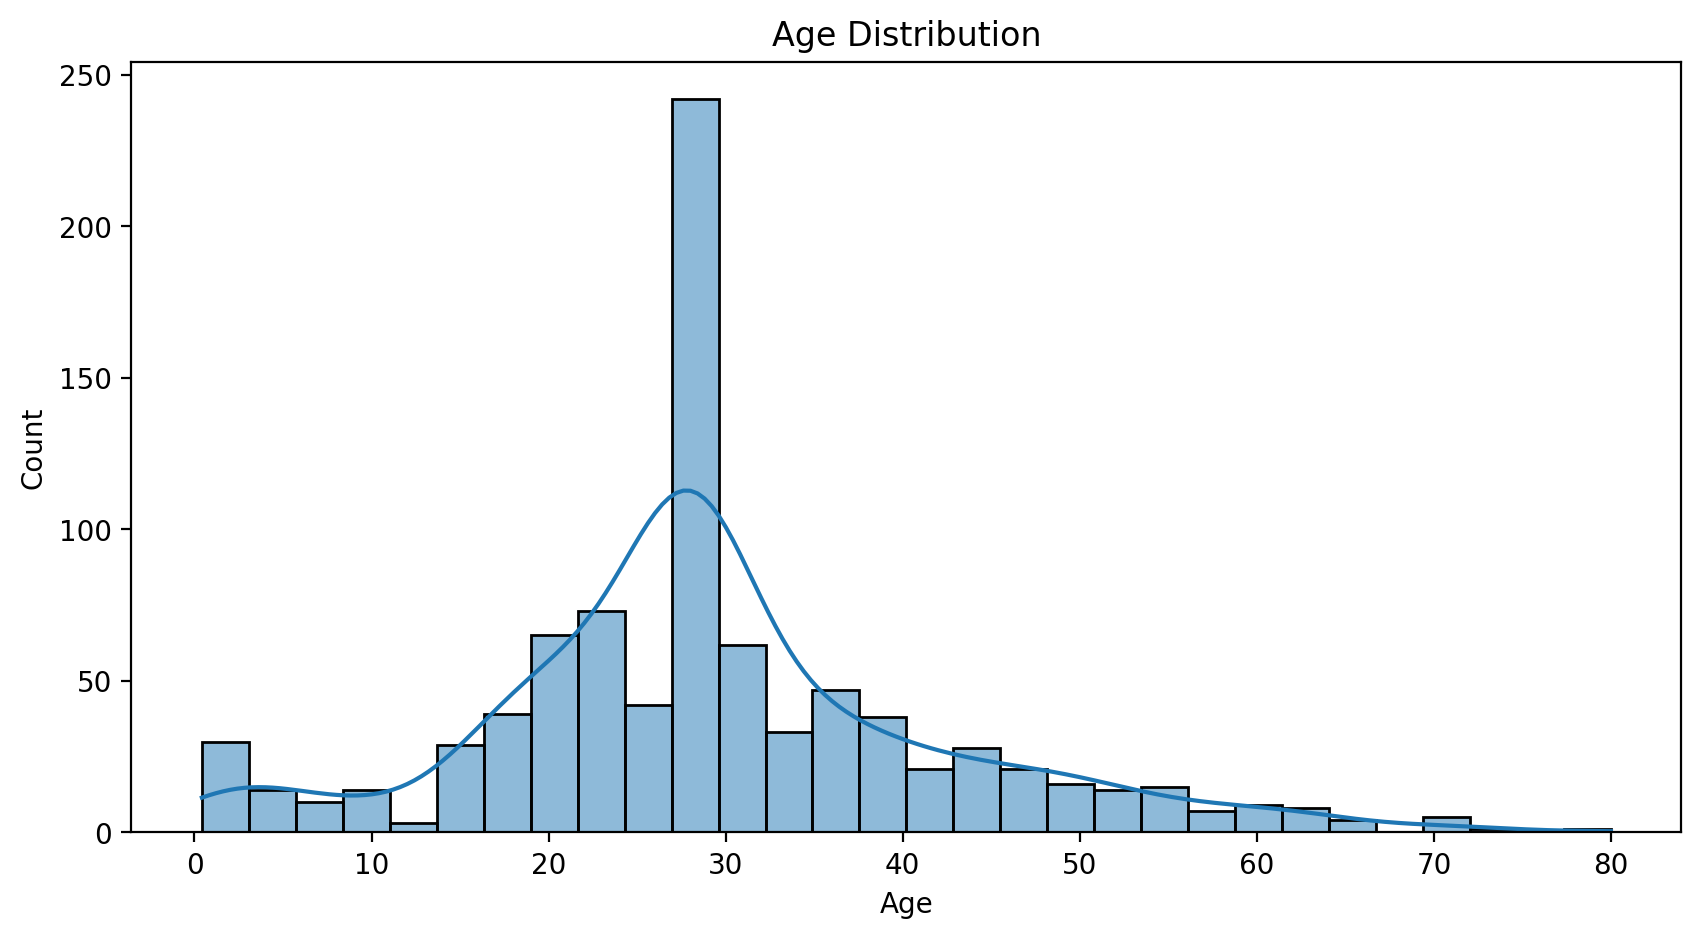

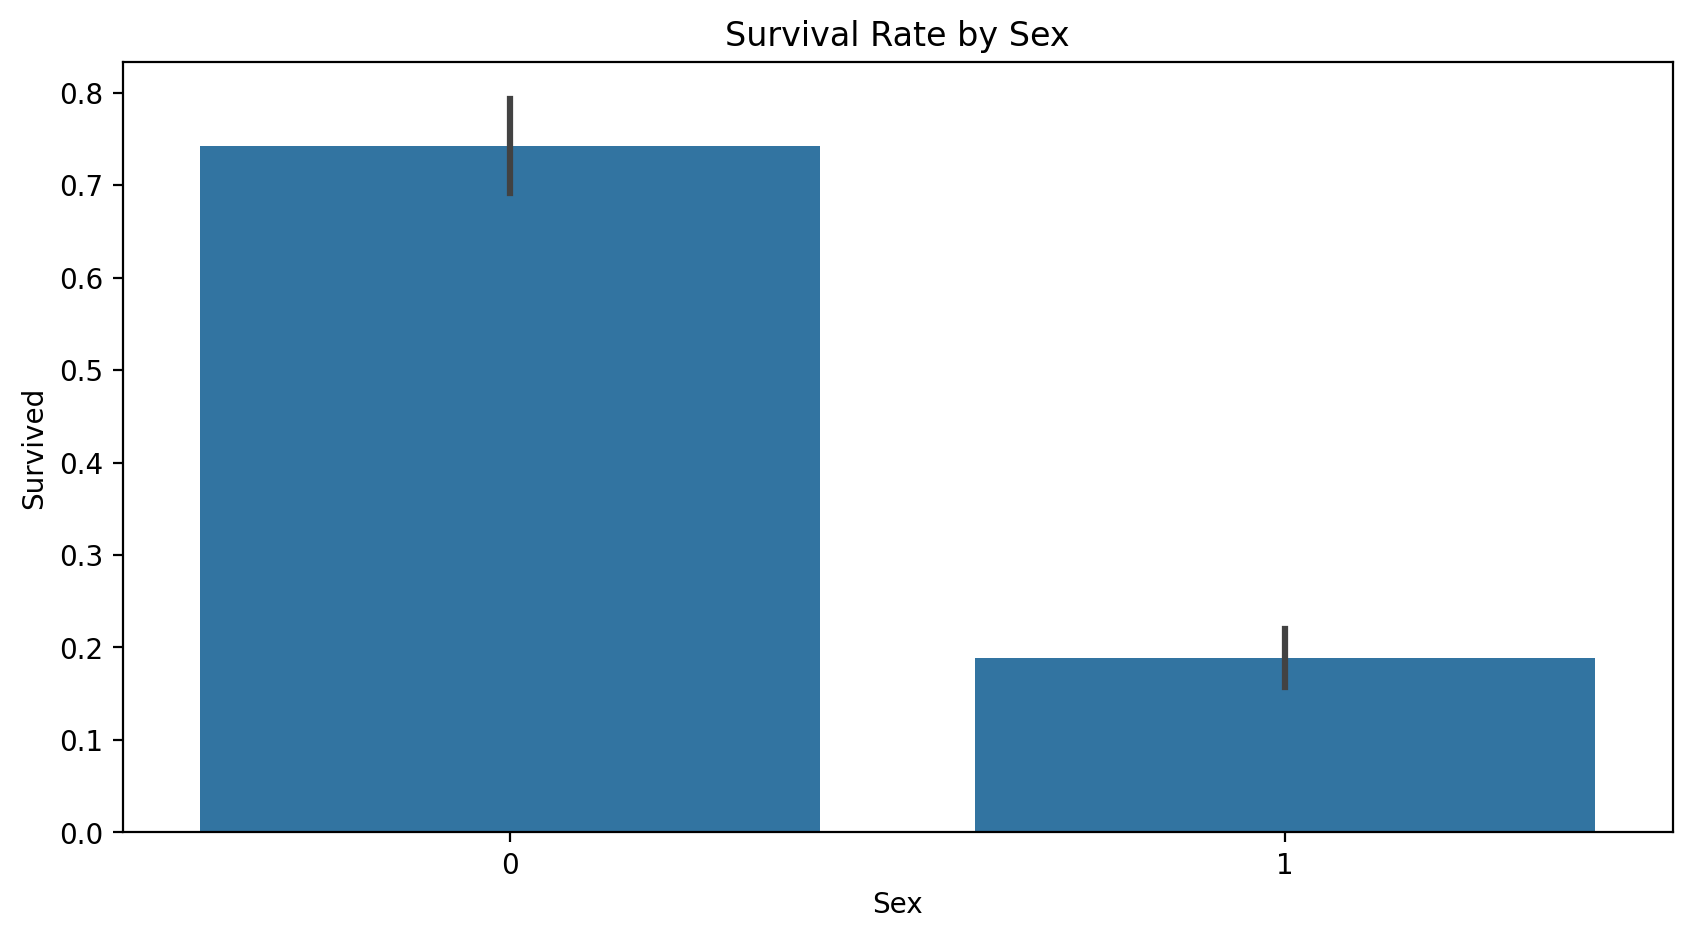

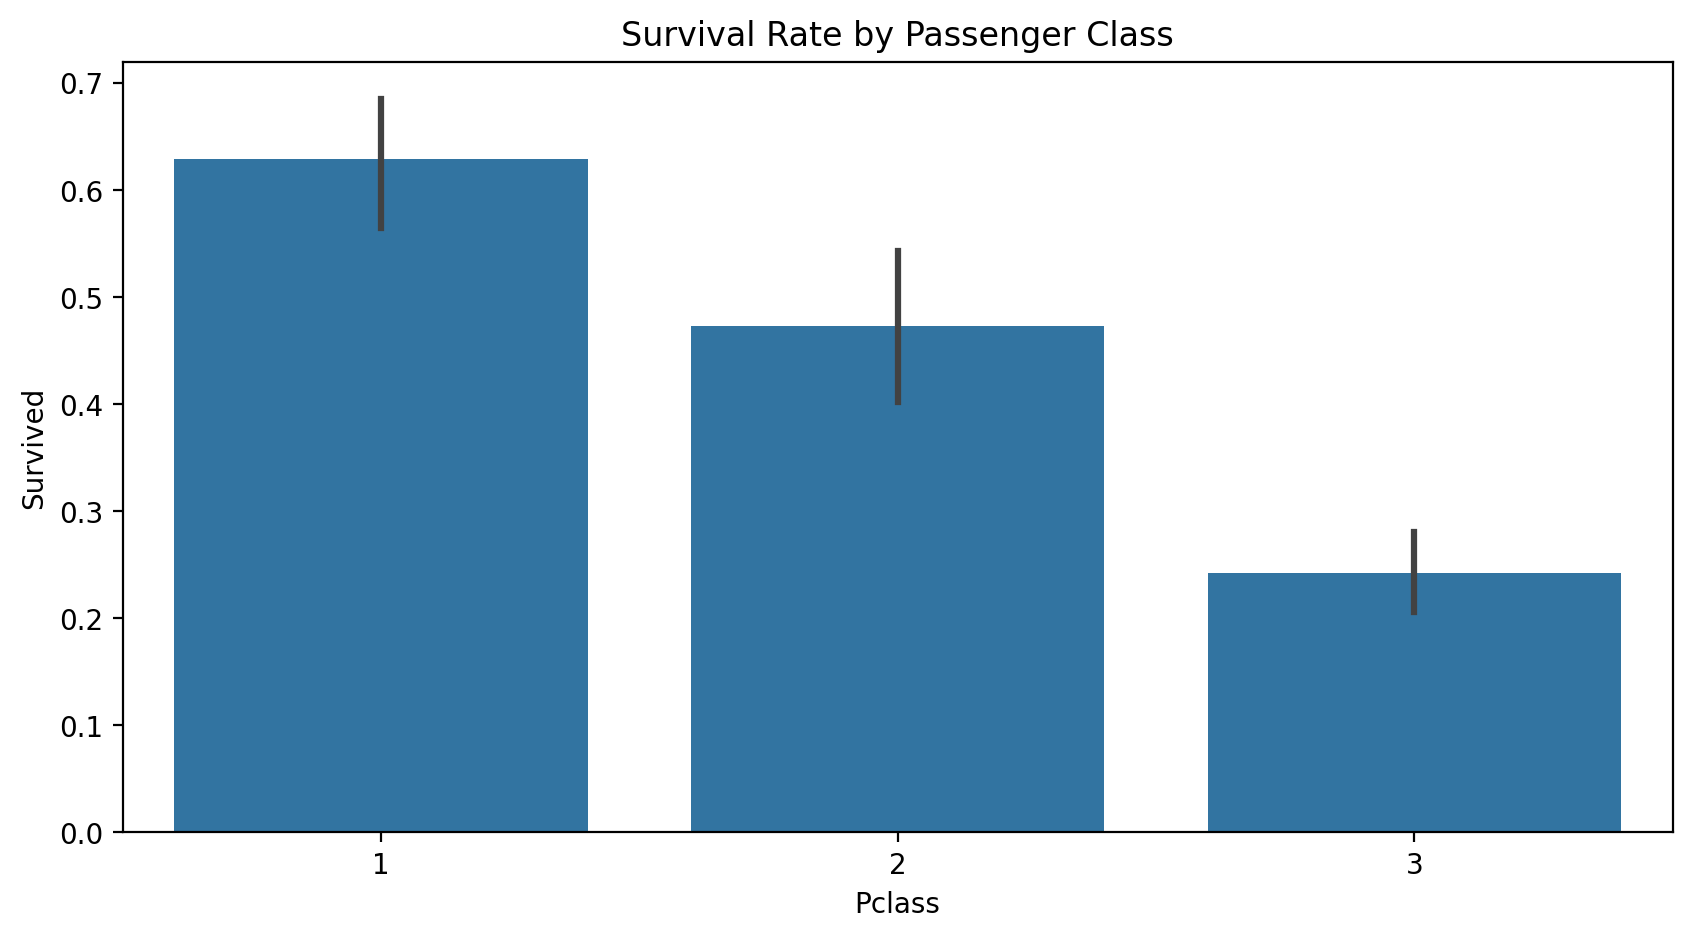

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Visualize the survival rate by 'Sex'
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Visualize the survival rate by 'Pclass'
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


In [10]:
# Check for any remaining missing values
print(df.isnull().sum())

# Final check of the dataset
print(df.head())


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
Title_Rare    0
dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           2       False   
1         1       1    0  38.0      1      0  71.2833           2       False   
2         1       3    0  26.0      0      0   7.9250           1       False   
3         1       1    0  35.0      1      0  53.1000           2       False   
4         0       3    1  35.0      0      0   8.0500           1       False   

   Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0        True       False      True      False       False  
1       False       False     False       True       False  
2        True        True     False      False       False  
3        True       False     Fa

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Define the features and target variable
x = df.drop('Survived', axis=1)
y = df['Survived']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(712, 13) (179, 13) (712,) (179,)


In [13]:
from xgboost import XGBClassifier

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## XGBM ##

In [18]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")

In [19]:
prediction(XGBClassifier())

Train Accuracy: 0.9662921348314607
Test Accuracy: 0.8100558659217877


In [20]:
params = {
    'n_estimators' : [50,65,80],
    'lambda' : [0.05,0.1,0.2],
    'max_depth' : [4,6,7,9]
}

In [21]:
grid = GridSearchCV(XGBClassifier(), param_grid=params, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'lambda': [0.05, 0.1, 0.2], 'max_depth': [4, 6, 7, 9],
                         'n_estimators': [50, 65, 80]},
             verbose=1)

In [22]:
grid.best_params_

{'lambda': 0.1, 'max_depth': 4, 'n_estimators': 50}

In [23]:
model = XGBClassifier(lambda_=0.1, max_depth=4, n_estimators=50)

In [24]:
prediction(model)

Train Accuracy: 0.9269662921348315
Test Accuracy: 0.8212290502793296


In [25]:
test_data = pd.read_csv('Titanic_test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [26]:
# Extract titles from the 'Name' column
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify the 'Title' column
test_data['Title'] = test_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_data['Title'] = test_data['Title'].replace(['Mme'], 'Mrs')
test_data['Title'] = test_data['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Lady', 'Countess'], 'Rare')

# Create a family size feature
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Drop unnecessary columns
test_data.drop(columns=['Ticket', 'Name', 'PassengerId'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)


# Encode 'Sex' column
test_data['Sex'] = LabelEncoder().fit_transform(test_data['Sex'])

# One-Hot Encode 'Embarked' and 'Title' columns
test_data = pd.get_dummies(test_data, columns=['Embarked', 'Title'], drop_first=True)


In [27]:
# Use the trained model to predict survivors in the test data
test_predictions = model.predict(test_data)

# Add predictions to the test data
test_data['Predicted_Survived'] = test_predictions

# Display the first few rows of the test data with predictions
print(test_data.head())


   Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  Embarked_Q  \
0       3    1  34.5      0      0   7.8292           1        True   
1       3    0  47.0      1      0   7.0000           2       False   
2       2    1  62.0      0      0   9.6875           1        True   
3       3    1  27.0      0      0   8.6625           1       False   
4       3    0  22.0      1      1  12.2875           3       False   

   Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Predicted_Survived  
0       False       False      True      False       False                   0  
1        True       False     False       True       False                   0  
2       False       False      True      False       False                   0  
3        True       False      True      False       False                   0  
4        True       False     False       True       False                   1  


In [28]:
from sklearn.metrics import accuracy_score

# Predict survivors using the trained model
test_predictions = model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, test_predictions)
print(f"Accuracy of Predictions: {accuracy * 100:.2f}%")


Accuracy of Predictions: 82.12%
